In [1]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from thunder import PCA, RegressionModel, Colorize
image = Colorize.image
sns.set_style('darkgrid')
sns.set_context('notebook')

In [32]:
data = tsc.loadImages('/mnt/downloads/20150417Aligned/11/', inputFormat='tif')

In [33]:
ts = data.toTimeSeries(size="64M")
norm=ts.normalize(baseline='percentile')
norm.cache();

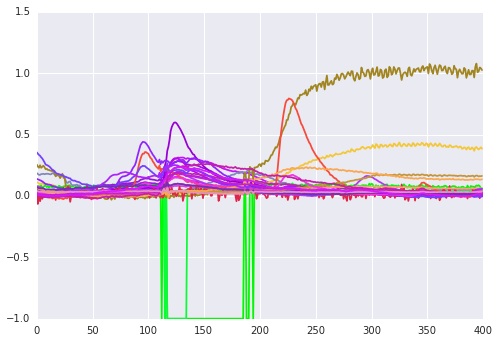

In [34]:
from thunder import KMeans, Colorize
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('notebook')
modelK=KMeans(k=30).fit(norm)
newclrs = Colorize.optimize(modelK.centers, asCmap=True)
sns.set_style('darkgrid')
plt.gca().set_color_cycle(newclrs.colors)
plt.plot(modelK.centers.T);

<matplotlib.colorbar.Colorbar instance at 0x7fae27bdc0e0>

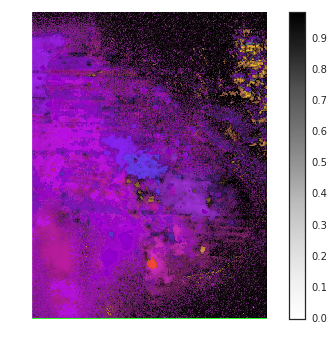

In [35]:
imgLabels = modelK.predict(norm).pack()
sim = modelK.similarity(norm)
imgSim = sim.pack()
brainmap = Colorize(cmap=newclrs).transform(imgLabels, mask=imgSim)
sns.set_style('white')
image(brainmap)
plt.colorbar()

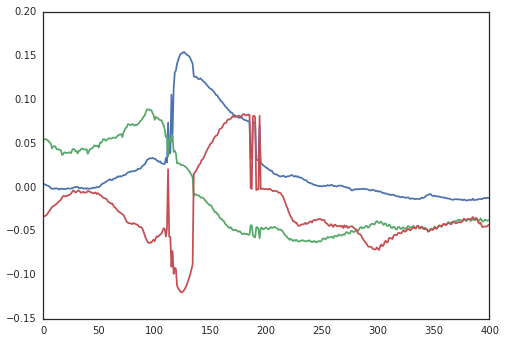

In [36]:
from thunder import PCA
modelcc=PCA(k=3).fit(norm)
plt.plot(modelcc.comps.T);

<matplotlib.colorbar.Colorbar instance at 0x7fae2e67e440>

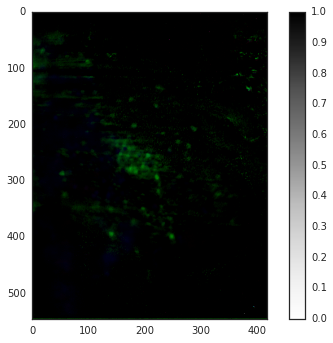

In [37]:
imgs = modelcc.scores.pack()
from thunder import Colorize
from numpy import amax
maps = Colorize(cmap='indexed', colors=[ "blue","green" , "red"], scale=2, vmin=0.001).transform(imgs)
sns.set_style('white')
plt.imshow(maps);
plt.colorbar()

In [38]:
from thunder import RegressionModel
import numpy as np
from numpy import sum, outer, inner, mean, shape, dot, transpose, concatenate, ones, asarray
test = np.zeros((3,400),dtype=np.int)
test[0,154:184]=1
test[1,234:264]=1
test[2,304:314]=1
model = RegressionModel.load(test, "linear")
results = model.fit(norm)

<matplotlib.colorbar.Colorbar instance at 0x7fae2e85bb48>

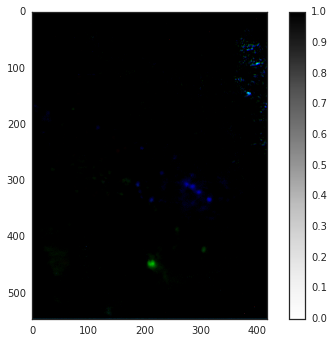

In [39]:
betas=results.select('betas').pack()
maps = Colorize(cmap='indexed', colors=[ "red","green", "blue"], vmin=0.02, scale=2).transform(betas)
plt.imshow(maps)
plt.colorbar()

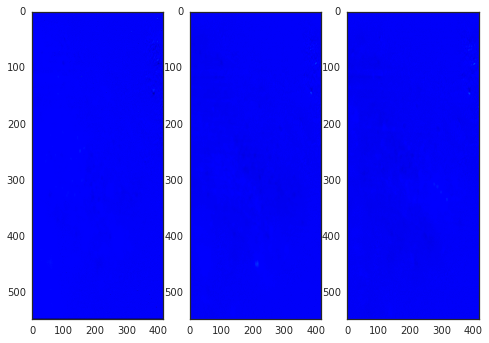

In [40]:
from matplotlib.pyplot import figure, show, axes, sci
from matplotlib import cm, colors
from numpy import amin, amax, ravel
vmin = amin(betas)
vmax = amax(betas)
fig = figure(dpi=300)
plt.subplots(1, 3, sharex=True, sharey=True)
for i in range(0,3):
    n=betas[i,]
    plt.subplot(1, 3, i+1)
    plt.imshow(n, vmin=vmin, vmax=vmax, cmap='jet', aspect='auto')

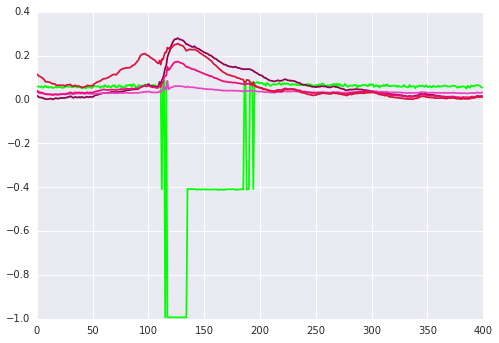

In [41]:
modelK=KMeans(k=5).fit(norm)
newclrs = Colorize.optimize(modelK.centers, asCmap=True)
sns.set_style('darkgrid')
plt.gca().set_color_cycle(newclrs.colors)
plt.plot(modelK.centers.T);

<matplotlib.colorbar.Colorbar instance at 0x7fae27fa3290>

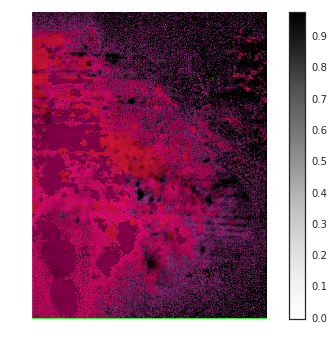

In [42]:
imgLabels = modelK.predict(norm).pack()
sim = modelK.similarity(norm)
imgSim = sim.pack()
brainmap = Colorize(cmap=newclrs).transform(imgLabels, mask=imgSim)
sns.set_style('white')
image(brainmap)
plt.colorbar()

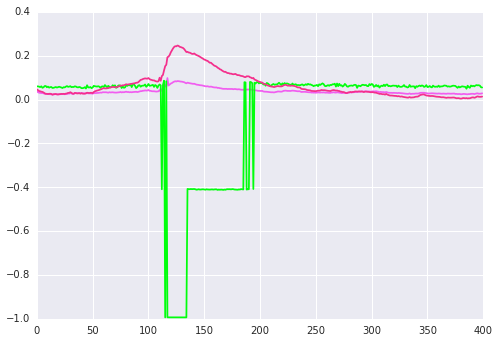

In [43]:
modelK=KMeans(k=3).fit(norm)
newclrs = Colorize.optimize(modelK.centers, asCmap=True)
sns.set_style('darkgrid')
plt.gca().set_color_cycle(newclrs.colors)
plt.plot(modelK.centers.T);

<matplotlib.colorbar.Colorbar instance at 0x7fae2c16c758>

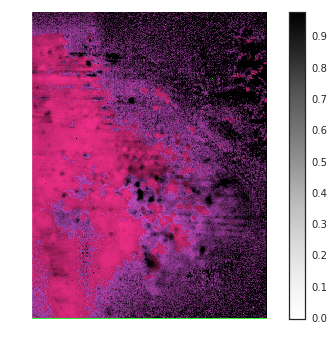

In [44]:
imgLabels = modelK.predict(norm).pack()
sim = modelK.similarity(norm)
imgSim = sim.pack()
brainmap = Colorize(cmap=newclrs).transform(imgLabels, mask=imgSim)
sns.set_style('white')
image(brainmap)
plt.colorbar()

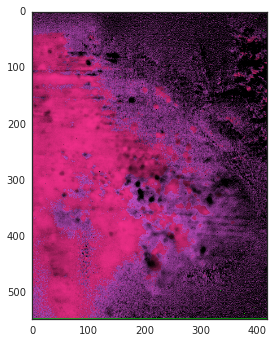

In [50]:
plt.imshow(brainmap)
plt.